In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
nba = pd.read_csv("final_nba_data.csv")

In [3]:
nba = nba.dropna() # drop na rows

In [4]:
nba.columns.values #new variables

array(['Unnamed: 0', 'SEASON_ID', 'TEAM_ID_x', 'TEAM_ABBREVIATION_x',
       'TEAM_NAME_x', 'GAME_ID', 'GAME_DATE', 'MATCHUP_x', 'WL_x',
       'PTS_x', 'DAYS_BTWN_GAMES_x', 'WINS_10GAMES_x', 'WINS_UPTOGAME_x',
       'AVGPOINTS_2GAMES_x', 'AVGPOINTS_3GAMES_x', 'AVGPOINTS_4GAMES_x',
       'TEAM_ID_y', 'TEAM_ABBREVIATION_y', 'TEAM_NAME_y', 'MATCHUP_y',
       'WL_y', 'PTS_y', 'DAYS_BTWN_GAMES_y', 'WINS_10GAMES_y',
       'WINS_UPTOGAME_y', 'AVGPOINTS_2GAMES_y', 'AVGPOINTS_3GAMES_y',
       'AVGPOINTS_4GAMES_y', 'TOT_PTS', 'distance_miles', 'rivalry',
       'pre_PTS', 'OFFICIAL_ID', 'FIRST_NAME', 'LAST_NAME', 'JERSEY_NUM'],
      dtype=object)

In [5]:
nba = nba[[
    'SEASON_ID', 'TEAM_ABBREVIATION_x', 'GAME_DATE', 'DAYS_BTWN_GAMES_x', 'WINS_10GAMES_x', 
    'TEAM_ABBREVIATION_y', 'DAYS_BTWN_GAMES_y', 'WINS_10GAMES_y', 'TOT_PTS', 
    'distance_miles', 'rivalry', 'pre_PTS', 'WINS_10GAMES_x', 'WINS_UPTOGAME_x',
       'AVGPOINTS_2GAMES_x', 'AVGPOINTS_3GAMES_x', 'AVGPOINTS_4GAMES_x', 'WINS_10GAMES_y',
       'WINS_UPTOGAME_y','AVGPOINTS_2GAMES_y', 'AVGPOINTS_3GAMES_y',
       'AVGPOINTS_4GAMES_y' # not including official ID for time being because doesn't do much
]]

In [6]:
nba.head()

,SEASON_ID,TEAM_ABBREVIATION_x,GAME_DATE,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,TEAM_ABBREVIATION_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,TOT_PTS,distance_miles,...,WINS_10GAMES_x,WINS_UPTOGAME_x,AVGPOINTS_2GAMES_x,AVGPOINTS_3GAMES_x,AVGPOINTS_4GAMES_x,WINS_10GAMES_y,WINS_UPTOGAME_y,AVGPOINTS_2GAMES_y,AVGPOINTS_3GAMES_y,AVGPOINTS_4GAMES_y
492,22016,SAS,2016-11-16,2.0,7.0,SAC,5.0,3.0,215,1740.22,...,7.0,8.0,100.0,98.666667,98.75,3.0,4.0,105.5,104.333333,102.25
493,22016,SAS,2016-11-16,2.0,7.0,SAC,5.0,3.0,215,1740.22,...,7.0,8.0,100.0,98.666667,98.75,3.0,4.0,105.5,104.333333,102.25
494,22016,SAS,2016-11-16,2.0,7.0,SAC,5.0,3.0,215,1740.22,...,7.0,8.0,100.0,98.666667,98.75,3.0,4.0,105.5,104.333333,102.25
564,22016,MIN,2016-11-19,2.0,4.0,MEM,1.0,6.0,164,830.78,...,4.0,4.0,109.0,114.333333,112.00,6.0,7.0,95.5,97.666667,97.25
565,22016,MIN,2016-11-19,2.0,4.0,MEM,1.0,6.0,164,830.78,...,4.0,4.0,109.0,114.333333,112.00,6.0,7.0,95.5,97.666667,97.25


In [7]:
# Create month variable for training
nba['GAME_DATE'] = pd.to_datetime(nba['GAME_DATE'])
nba['MONTH'] = nba['GAME_DATE'].dt.month

In [8]:
nba.head()

,SEASON_ID,TEAM_ABBREVIATION_x,GAME_DATE,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,TEAM_ABBREVIATION_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,TOT_PTS,distance_miles,...,WINS_UPTOGAME_x,AVGPOINTS_2GAMES_x,AVGPOINTS_3GAMES_x,AVGPOINTS_4GAMES_x,WINS_10GAMES_y,WINS_UPTOGAME_y,AVGPOINTS_2GAMES_y,AVGPOINTS_3GAMES_y,AVGPOINTS_4GAMES_y,MONTH
492,22016,SAS,2016-11-16,2.0,7.0,SAC,5.0,3.0,215,1740.22,...,8.0,100.0,98.666667,98.75,3.0,4.0,105.5,104.333333,102.25,11
493,22016,SAS,2016-11-16,2.0,7.0,SAC,5.0,3.0,215,1740.22,...,8.0,100.0,98.666667,98.75,3.0,4.0,105.5,104.333333,102.25,11
494,22016,SAS,2016-11-16,2.0,7.0,SAC,5.0,3.0,215,1740.22,...,8.0,100.0,98.666667,98.75,3.0,4.0,105.5,104.333333,102.25,11
564,22016,MIN,2016-11-19,2.0,4.0,MEM,1.0,6.0,164,830.78,...,4.0,109.0,114.333333,112.00,6.0,7.0,95.5,97.666667,97.25,11
565,22016,MIN,2016-11-19,2.0,4.0,MEM,1.0,6.0,164,830.78,...,4.0,109.0,114.333333,112.00,6.0,7.0,95.5,97.666667,97.25,11


In [9]:
nba.columns.values

array(['SEASON_ID', 'TEAM_ABBREVIATION_x', 'GAME_DATE',
       'DAYS_BTWN_GAMES_x', 'WINS_10GAMES_x', 'TEAM_ABBREVIATION_y',
       'DAYS_BTWN_GAMES_y', 'WINS_10GAMES_y', 'TOT_PTS', 'distance_miles',
       'rivalry', 'pre_PTS', 'WINS_10GAMES_x', 'WINS_UPTOGAME_x',
       'AVGPOINTS_2GAMES_x', 'AVGPOINTS_3GAMES_x', 'AVGPOINTS_4GAMES_x',
       'WINS_10GAMES_y', 'WINS_UPTOGAME_y', 'AVGPOINTS_2GAMES_y',
       'AVGPOINTS_3GAMES_y', 'AVGPOINTS_4GAMES_y', 'MONTH'], dtype=object)

In [10]:
nba.shape

(8462, 23)

In [11]:
categorical_vars = pd.get_dummies(nba[[
    'SEASON_ID', 'TEAM_ABBREVIATION_x', 'TEAM_ABBREVIATION_y', 'MONTH'
]])

categorical_vars.head() # looks good

,SEASON_ID,MONTH,TEAM_ABBREVIATION_x_ATL,TEAM_ABBREVIATION_x_BKN,TEAM_ABBREVIATION_x_BOS,TEAM_ABBREVIATION_x_CHA,TEAM_ABBREVIATION_x_CHI,TEAM_ABBREVIATION_x_CLE,TEAM_ABBREVIATION_x_DAL,TEAM_ABBREVIATION_x_DEN,...,TEAM_ABBREVIATION_y_OKC,TEAM_ABBREVIATION_y_ORL,TEAM_ABBREVIATION_y_PHI,TEAM_ABBREVIATION_y_PHX,TEAM_ABBREVIATION_y_POR,TEAM_ABBREVIATION_y_SAC,TEAM_ABBREVIATION_y_SAS,TEAM_ABBREVIATION_y_TOR,TEAM_ABBREVIATION_y_UTA,TEAM_ABBREVIATION_y_WAS
492,22016,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
493,22016,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
494,22016,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
564,22016,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565,22016,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# add to df 
nba_trans = pd.concat([
    nba[[
        'GAME_DATE', 'DAYS_BTWN_GAMES_x', 'WINS_10GAMES_x', 
        'WINS_10GAMES_y','DAYS_BTWN_GAMES_y', 'WINS_10GAMES_y',
        'TOT_PTS', 'distance_miles', 'rivalry', 'pre_PTS',
    ]], categorical_vars], axis=1)


In [13]:
nba_trans.head()

,GAME_DATE,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,WINS_10GAMES_x,WINS_10GAMES_y,WINS_10GAMES_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,WINS_10GAMES_y,TOT_PTS,...,TEAM_ABBREVIATION_y_OKC,TEAM_ABBREVIATION_y_ORL,TEAM_ABBREVIATION_y_PHI,TEAM_ABBREVIATION_y_PHX,TEAM_ABBREVIATION_y_POR,TEAM_ABBREVIATION_y_SAC,TEAM_ABBREVIATION_y_SAS,TEAM_ABBREVIATION_y_TOR,TEAM_ABBREVIATION_y_UTA,TEAM_ABBREVIATION_y_WAS
492,2016-11-16,2.0,7.0,7.0,3.0,3.0,5.0,3.0,3.0,215,...,0,0,0,0,0,1,0,0,0,0
493,2016-11-16,2.0,7.0,7.0,3.0,3.0,5.0,3.0,3.0,215,...,0,0,0,0,0,1,0,0,0,0
494,2016-11-16,2.0,7.0,7.0,3.0,3.0,5.0,3.0,3.0,215,...,0,0,0,0,0,1,0,0,0,0
564,2016-11-19,2.0,4.0,4.0,6.0,6.0,1.0,6.0,6.0,164,...,0,0,0,0,0,0,0,0,0,0
565,2016-11-19,2.0,4.0,4.0,6.0,6.0,1.0,6.0,6.0,164,...,0,0,0,0,0,0,0,0,0,0


In [14]:
nba_trans.shape

(8462, 75)

In [15]:
X = nba_trans.drop(['TOT_PTS', 'GAME_DATE'], axis = 1)

In [16]:
y = nba_trans['TOT_PTS']

## 1. Random Test/Training 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 614)

In [20]:
train = nba_trans[nba_trans.GAME_DATE.dt.year.isin([2017,2018])]
test = nba_trans[nba_trans.GAME_DATE.dt.year == 2019]

In [21]:
X_train = train.drop(['TOT_PTS', 'GAME_DATE'], axis = 1)
X_test = test.drop(['TOT_PTS', 'GAME_DATE'], axis = 1)
y_train = train['TOT_PTS']
y_test = test['TOT_PTS']

In [22]:
# correlation matrix 
correlation_matrix = pd.DataFrame(np.corrcoef(X_train, rowvar = 0))

# label the different features:
correlation_matrix.columns = X.columns
correlation_matrix.index = X.columns

correlation_matrix

,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,WINS_10GAMES_x,WINS_10GAMES_y,WINS_10GAMES_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,WINS_10GAMES_y,distance_miles,rivalry,...,TEAM_ABBREVIATION_y_OKC,TEAM_ABBREVIATION_y_ORL,TEAM_ABBREVIATION_y_PHI,TEAM_ABBREVIATION_y_PHX,TEAM_ABBREVIATION_y_POR,TEAM_ABBREVIATION_y_SAC,TEAM_ABBREVIATION_y_SAS,TEAM_ABBREVIATION_y_TOR,TEAM_ABBREVIATION_y_UTA,TEAM_ABBREVIATION_y_WAS
DAYS_BTWN_GAMES_x,1.000000,0.058950,0.058950,0.113343,0.113343,0.504432,0.113343,0.113343,-0.008135,0.003021,...,0.025438,-0.001756,-0.004091,-0.029725,0.005976,-0.014441,0.003426,0.029815,0.023046,-0.061289
WINS_10GAMES_x,0.058950,1.000000,1.000000,0.203759,0.203759,0.081119,0.203759,0.203759,0.021155,-0.027957,...,-0.013633,-0.029616,-0.003052,0.010828,0.024920,0.003202,0.010828,-0.009536,-0.003113,-0.001145
WINS_10GAMES_x,0.058950,1.000000,1.000000,0.203759,0.203759,0.081119,0.203759,0.203759,0.021155,-0.027957,...,-0.013633,-0.029616,-0.003052,0.010828,0.024920,0.003202,0.010828,-0.009536,-0.003113,-0.001145
WINS_10GAMES_y,0.113343,0.203759,0.203759,1.000000,1.000000,0.065287,1.000000,1.000000,0.051236,-0.033800,...,0.060342,-0.129410,0.069614,-0.194412,0.080908,-0.074135,0.060430,0.140501,0.048386,0.018565
WINS_10GAMES_y,0.113343,0.203759,0.203759,1.000000,1.000000,0.065287,1.000000,1.000000,0.051236,-0.033800,...,0.060342,-0.129410,0.069614,-0.194412,0.080908,-0.074135,0.060430,0.140501,0.048386,0.018565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEAM_ABBREVIATION_y_SAC,-0.014441,0.003202,0.003202,-0.074135,-0.074135,-0.012421,-0.074135,-0.074135,0.104163,-0.050147,...,-0.033165,-0.034940,-0.034189,-0.034691,-0.034691,1.000000,-0.034691,-0.033935,-0.032904,-0.033935
TEAM_ABBREVIATION_y_SAS,0.003426,0.010828,0.010828,0.060430,0.060430,-0.032128,0.060430,0.060430,0.001313,0.113555,...,-0.034160,-0.035988,-0.035215,-0.035732,-0.035732,-0.034691,1.000000,-0.034954,-0.033892,-0.034954
TEAM_ABBREVIATION_y_TOR,0.029815,-0.009536,-0.009536,0.140501,0.140501,0.011175,0.140501,0.140501,-0.056053,-0.050527,...,-0.033416,-0.035204,-0.034448,-0.034954,-0.034954,-0.033935,-0.034954,1.000000,-0.033154,-0.034192
TEAM_ABBREVIATION_y_UTA,0.023046,-0.003113,-0.003113,0.048386,0.048386,0.007897,0.048386,0.048386,0.050784,-0.016447,...,-0.032401,-0.034135,-0.033401,-0.033892,-0.033892,-0.032904,-0.033892,-0.033154,1.000000,-0.033154


 ## 1.1. Ridge

Should we care about fixed effects???
https://stats.stackexchange.com/questions/212297/why-disable-ridge-lasso-penalty-for-fixed-effects

In [24]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# specify alpha
reg_CV = linear_model.RidgeCV(alphas=np.linspace(start=0.1, stop=10, num=100), cv=5)
reg_CV.fit(X_train, y_train)

# optimal alpha
reg_CV.alpha_

10.0

In [25]:
# coefficients 
print(pd.Series(reg_CV.coef_, index = X.columns))

DAYS_BTWN_GAMES_x          0.029972
WINS_10GAMES_x             0.110662
WINS_10GAMES_x             0.110662
WINS_10GAMES_y            -0.052076
WINS_10GAMES_y            -0.052076
                             ...   
TEAM_ABBREVIATION_y_SAC   -2.124840
TEAM_ABBREVIATION_y_SAS   -6.896459
TEAM_ABBREVIATION_y_TOR    1.356974
TEAM_ABBREVIATION_y_UTA   -8.310115
TEAM_ABBREVIATION_y_WAS    5.781071
Length: 73, dtype: float64


In [26]:
print ("Intercept is: {0}".format(reg_CV.intercept_))
print ("Prediction for first game in test dataset: {0}".format(reg_CV.predict(X_test[0:1])))

Intercept is: -135693.1216573347
Prediction for first game in test dataset: [226.40946013]


In [27]:
# model metrics
score_ridge = reg_CV.score(X_train, y_train)
ypred_ridge = reg_CV.predict(X_test)
mse_ridge = mean_squared_error(y_test, ypred_ridge)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

R2:0.156, MSE:401.88, RMSE:20.05


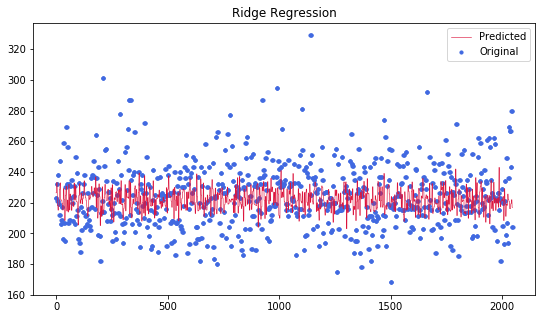

In [28]:
plt.figure(figsize=(9, 5))
xx_ridge = range(len(X_test))
plt.scatter(xx_ridge, y_test, s=10, color="royalblue", label="Original")
plt.plot(xx_ridge, ypred_ridge, lw=0.6, color="crimson", label="Predicted")
plt.legend()
plt.title('Ridge Regression')
plt.show()

<Figure size 648x360 with 0 Axes>

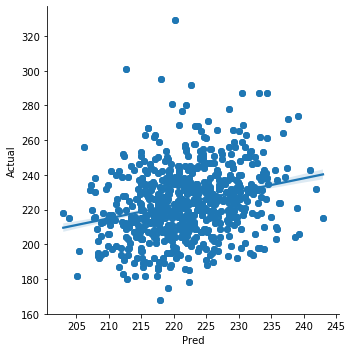

In [29]:
plt.figure(figsize=(9, 5))
plot_ridge = pd.DataFrame({'Pred': ypred_ridge, 'Actual': y_test})
sns.lmplot(x = 'Pred', y = 'Actual', data = plot_ridge)

In [30]:
plot_ridge.head(n = 10)

,Pred,Actual
9023,226.409460,223
9024,226.409460,223
9025,226.409460,223
9026,233.159379,232
9027,233.159379,232
9028,233.159379,232
9029,218.179794,221
9030,218.179794,221
9031,218.179794,221
9032,215.107402,238


In [31]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

for ind, i in enumerate(lambdas):    
    reg = Ridge(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

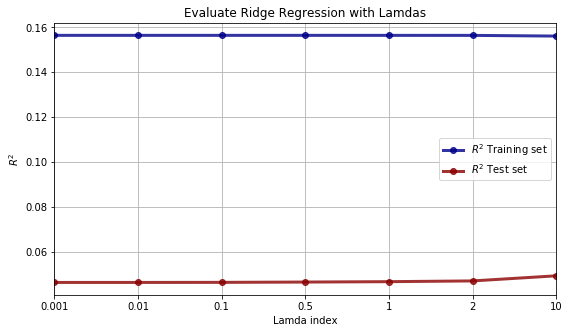

In [32]:
# Plotting
plt.figure(figsize=(9, 5))
x = [0.001, 0.01, 0.1, 0.5, 1, 2, 10]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", 
         alpha=0.8, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", 
         alpha=0.8, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate Ridge Regression with Lamdas')
plt.legend(loc='best')
plt.grid()

## 1.2. Lasso

In [33]:
reg_lasso_CV = linear_model.LassoCV(eps = 0.001, n_alphas = 100, 
                                    alphas=[0.1, 1.0, 10.0], cv=5)
reg_lasso_CV.fit(X_train, y_train)

LassoCV(alphas=[0.1, 1.0, 10.0], copy_X=True, cv=5, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [34]:
# optimal alpha
reg_lasso_CV.alpha_

0.1

In [35]:
# coefficients 
print(pd.Series(reg_lasso_CV.coef_, index = X.columns))

DAYS_BTWN_GAMES_x         -0.000000e+00
WINS_10GAMES_x             1.515551e-01
WINS_10GAMES_x             0.000000e+00
WINS_10GAMES_y            -7.257626e-02
WINS_10GAMES_y            -1.193404e-16
                               ...     
TEAM_ABBREVIATION_y_SAC   -0.000000e+00
TEAM_ABBREVIATION_y_SAS   -3.882622e+00
TEAM_ABBREVIATION_y_TOR    0.000000e+00
TEAM_ABBREVIATION_y_UTA   -4.861009e+00
TEAM_ABBREVIATION_y_WAS    2.507525e+00
Length: 73, dtype: float64


In [36]:
print ("Alpha is: {0}".format(reg_lasso_CV.alpha_))

print ("Intercept is: {0}".format(reg_lasso_CV.intercept_))

prediction = reg_lasso_CV.predict(X_test[0:1])

print ("Prediction for first game in test dataset: {0}".format(prediction))

Alpha is: 0.1
Intercept is: -127328.91009959763
Prediction for first game in test dataset: [224.99125634]


In [37]:
# model metrics
from sklearn.linear_model import Lasso

score_lasso = reg_lasso_CV.score(X_train, y_train)
ypred_lasso = reg_lasso_CV.predict(X_test)
mse_lasso = mean_squared_error(y_test, ypred_lasso)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_lasso, mse_lasso, np.sqrt(mse_lasso)))

R2:0.120, MSE:405.52, RMSE:20.14


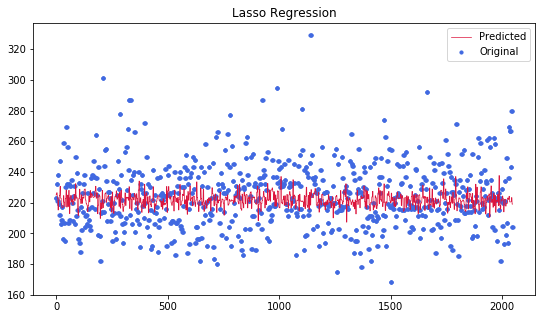

In [133]:
plt.figure(figsize=(9, 5))
xx_lasso = range(len(X_test))
plt.scatter(xx_lasso, y_test, s=10, color="royalblue", label="Original")
plt.plot(xx_lasso, ypred_lasso, lw=0.7, color="crimson", label="Predicted")
plt.legend()
plt.title('Lasso Regression')
plt.show()

<Figure size 648x360 with 0 Axes>

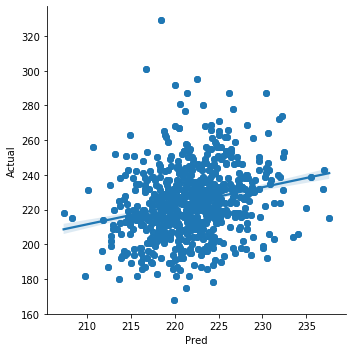

In [39]:
plt.figure(figsize=(9, 5))
plot_lasso = pd.DataFrame({'Pred': ypred_lasso, 'Actual': y_test})
sns.lmplot(x = 'Pred', y = 'Actual', data = plot_lasso)

In [40]:
plot_lasso.head(n = 10)

,Pred,Actual
9023,224.991256,223
9024,224.991256,223
9025,224.991256,223
9026,226.431821,232
9027,226.431821,232
9028,226.431821,232
9029,222.868951,221
9030,222.868951,221
9031,222.868951,221
9032,215.244712,238


In [41]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

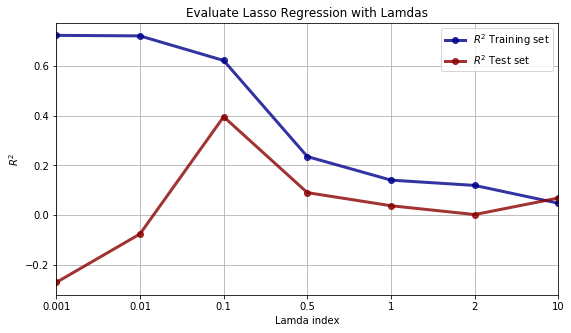

In [134]:
# Plotting
plt.figure(figsize=(9, 5))
x = [0.001, 0.01, 0.1, 0.5, 1, 2, 10]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", 
         alpha=0.8, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", 
         alpha=0.8, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate Lasso Regression with Lamdas')
plt.legend(loc='best')
plt.grid()

## 1.3. Elastic Net

In [70]:
# Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


reg_elastic_net_CV = linear_model.ElasticNetCV(alphas=[0.1, 0.5, 1.0, 1.5, 1, 3, 5, 10.0], 
                                               l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
                                               cv=5)
reg_elastic_net_CV.fit(X_train, y_train)

ElasticNetCV(alphas=[0.1, 0.5, 1.0, 1.5, 1, 3, 5, 10.0], copy_X=True, cv=5,
             eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [71]:
# optimal alpha
reg_elastic_net_CV.alpha_

0.1

In [72]:
# coefficients 
print(pd.Series(reg_elastic_net_CV.coef_, index = X.columns))

DAYS_BTWN_GAMES_x         -0.000000
WINS_10GAMES_x             0.123229
WINS_10GAMES_x             0.036791
WINS_10GAMES_y            -0.040226
WINS_10GAMES_y            -0.011809
                             ...   
TEAM_ABBREVIATION_y_SAC   -0.000000
TEAM_ABBREVIATION_y_SAS   -2.325874
TEAM_ABBREVIATION_y_TOR    0.000000
TEAM_ABBREVIATION_y_UTA   -2.739626
TEAM_ABBREVIATION_y_WAS    1.820725
Length: 73, dtype: float64


In [73]:
print ("Alpha is: {0}".format(reg_elastic_net_CV.alpha_))

print ("Grid of alphas used is: {0}".format(reg_elastic_net_CV.alphas_))

print ("L1 ratio is: {0}".format(reg_elastic_net_CV.l1_ratio_))

print ("Intercept is: {0}".format(reg_elastic_net_CV.intercept_))

prediction = reg_elastic_net_CV.predict(X_test[0:1])

print ("Prediction for first house in test dataset: {0}".format(prediction))

Alpha is: 0.1
Grid of alphas used is: [10.   5.   3.   1.5  1.   1.   0.5  0.1]
L1 ratio is: 0.7
Intercept is: -115953.0105029735
Prediction for first house in test dataset: [225.23769071]


In [74]:
# model metrics
score_enet = reg_elastic_net_CV.score(X_test, y_test)
ypred_enet = reg_elastic_net_CV.predict(X_test)
mse_enet = mean_squared_error(y_test, ypred_enet)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_enet, mse_enet, np.sqrt(mse_enet)))

R2:0.027, MSE:411.49, RMSE:20.29


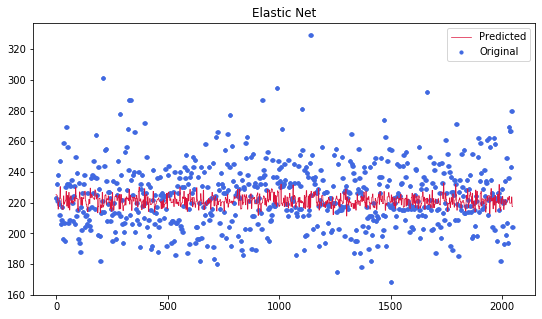

In [75]:
plt.figure(figsize=(9, 5))
xx = range(len(X_test))
plt.scatter(xx, y_test, s=10, color="royalblue", label="Original")
plt.plot(xx, ypred_enet, lw=0.7, color="crimson", label="Predicted")
plt.legend()
plt.title('Elastic Net')
plt.show()

<Figure size 648x360 with 0 Axes>

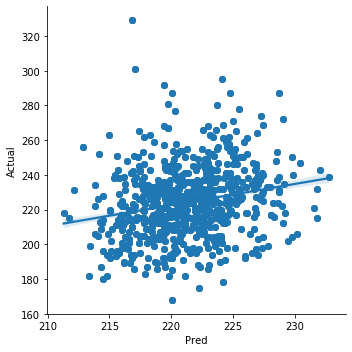

In [76]:
plt.figure(figsize=(9, 5))
plot_enet = pd.DataFrame({'Pred': ypred_enet, 'Actual': y_test})
sns.lmplot(x = 'Pred', y = 'Actual', data = plot_enet)

In [77]:
plot_enet.head(n = 10)

,Pred,Actual
9023,225.237691,223
9024,225.237691,223
9025,225.237691,223
9026,224.831943,232
9027,224.831943,232
9028,224.831943,232
9029,221.921129,221
9030,221.921129,221
9031,221.921129,221
9032,215.775433,238


In [78]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

for ind, i in enumerate(lambdas):    
    reg = ElasticNet(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

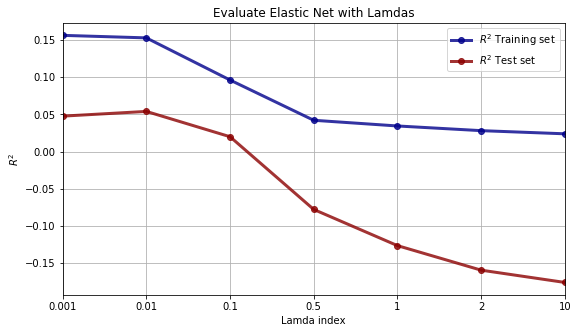

In [79]:
# Plotting
plt.figure(figsize=(9, 5))
x = [0.001, 0.01, 0.1, 0.5, 1, 2, 10]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", 
         alpha=0.8, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", 
         alpha=0.8, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate Elastic Net with Lamdas')
plt.legend(loc='best')
plt.grid()

## 1.4. Conclusion 

In [80]:
print("Ridge(MSE):{0:.3f}, Lasso(MSE):{1:.2f}, Elastic Net(MSE):{2:.2f}"
      .format(mse_ridge, mse_lasso, mse_enet))

Ridge(MSE):401.879, Lasso(MSE):405.52, Elastic Net(MSE):411.49


In [81]:
print("Ridge(R2):{0:.3f}, Lasso(R2):{1:.2f}, Elastic Net(R2):{2:.2f}"
      .format(score_ridge, score_lasso, score_enet))

Ridge(R2):0.156, Lasso(R2):0.12, Elastic Net(R2):0.03


Unlike the last try, it seems the ridge model performs better than the others. The R2 is much better than the last models...

## 2. Test/Training Sets by Time Periods

Following Daniel's approach, split the training/test sets by time periods. 

In [82]:
train = nba_trans[nba_trans.GAME_DATE.dt.year != 2019]
test = nba_trans[nba_trans.GAME_DATE.dt.year == 2019]

In [83]:
X_train2 = train.drop(['TOT_PTS', 'GAME_DATE'], axis = 1)
X_test2 = test.drop(['TOT_PTS', 'GAME_DATE'], axis = 1)
y_train2 = train['TOT_PTS']
y_test2 = test['TOT_PTS']

## 2.1. Ridge

In [84]:
reg_CV.fit(X_train2, y_train2)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [85]:
# coefficients 
print(pd.Series(reg_CV.coef_, index = X.columns))

DAYS_BTWN_GAMES_x          0.028187
WINS_10GAMES_x             0.101891
WINS_10GAMES_x             0.101891
WINS_10GAMES_y            -0.050546
WINS_10GAMES_y            -0.050546
                             ...   
TEAM_ABBREVIATION_y_SAC   -1.871284
TEAM_ABBREVIATION_y_SAS   -6.779841
TEAM_ABBREVIATION_y_TOR    2.101949
TEAM_ABBREVIATION_y_UTA   -8.623656
TEAM_ABBREVIATION_y_WAS    5.666517
Length: 73, dtype: float64


In [86]:
print ("Intercept is: {0}".format(reg_CV.intercept_))
print ("Prediction for first game in test dataset: {0}".format(reg_CV.predict(X_test[0:1])))

Intercept is: -132984.743958171
Prediction for first game in test dataset: [226.74646851]


In [87]:
# model metrics
score_ridge2 = reg_CV.score(X_train2, y_train2)
ypred_ridge2 = reg_CV.predict(X_test2)
mse_ridge2 = mean_squared_error(y_test2, ypred_ridge2)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_ridge2, mse_ridge2, np.sqrt(mse_ridge2)))

R2:0.159, MSE:402.15, RMSE:20.05


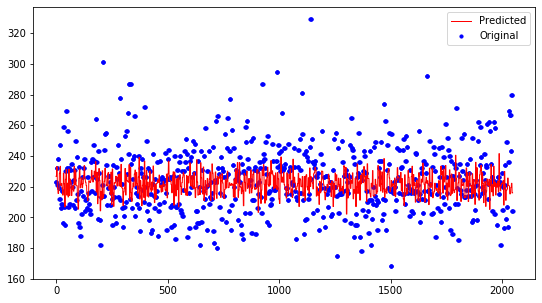

In [135]:
plt.figure(figsize=(9, 5))
xx_ridge2 = range(len(X_test2))
plt.scatter(xx_ridge2, y_test2, s=10, color="b", label="Original")
plt.plot(xx_ridge2, ypred_ridge2, lw=1, color="r", label="Predicted")
plt.legend()
plt.show()

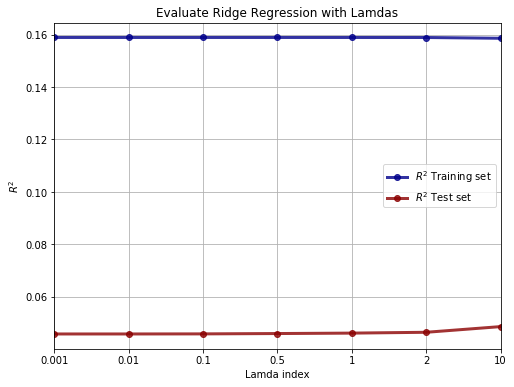

In [141]:
for ind, i in enumerate(lambdas):    
    reg = Ridge(alpha = i)
    reg.fit(X_train2, y_train2)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train2, y_train2)
    test_r_squared[ind] = reg.score(X_test2, y_test2)
    
# Plotting
plt.figure(figsize=(8, 6))
x = [0.001, 0.01, 0.1, 0.5, 1, 2, 10]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", 
         alpha=0.8, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", 
         alpha=0.8, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate Ridge Regression with Lamdas')
plt.legend(loc='best')
plt.grid()

## 2.2. Lasso

In [90]:
reg_lasso_CV.fit(X_train2, y_train2)

LassoCV(alphas=[0.1, 1.0, 10.0], copy_X=True, cv=5, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [91]:
# coefficients 
print(pd.Series(reg_lasso_CV.coef_, index = X.columns))

print ("Alpha is: {0}".format(reg_lasso_CV.alpha_))

print ("Intercept is: {0}".format(reg_lasso_CV.intercept_))

prediction = reg_lasso_CV.predict(X_test[0:1])

print ("Prediction for first game in test dataset: {0}".format(prediction))


DAYS_BTWN_GAMES_x         -0.000000e+00
WINS_10GAMES_x             1.491008e-01
WINS_10GAMES_x             1.361006e-16
WINS_10GAMES_y            -4.587101e-02
WINS_10GAMES_y            -0.000000e+00
                               ...     
TEAM_ABBREVIATION_y_SAC   -0.000000e+00
TEAM_ABBREVIATION_y_SAS   -3.726243e+00
TEAM_ABBREVIATION_y_TOR    0.000000e+00
TEAM_ABBREVIATION_y_UTA   -5.294702e+00
TEAM_ABBREVIATION_y_WAS    2.344129e+00
Length: 73, dtype: float64
Alpha is: 0.1
Intercept is: -125366.23668525356
Prediction for first game in test dataset: [224.92776558]


In [92]:
# model metrics
from sklearn.linear_model import Lasso

score_lasso2 = reg_lasso_CV.score(X_train2, y_train2)
ypred_lasso2 = reg_lasso_CV.predict(X_test2)
mse_lasso2 = mean_squared_error(y_test2, ypred_lasso2)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_lasso2, mse_lasso2, np.sqrt(mse_lasso2)))

R2:0.122, MSE:405.03, RMSE:20.13


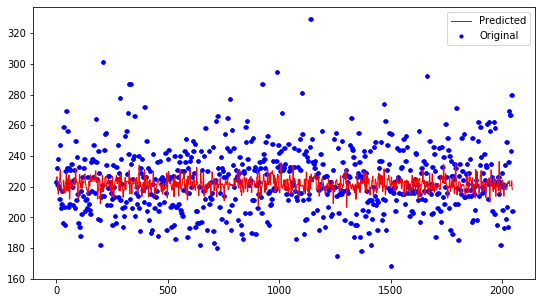

In [136]:
plt.figure(figsize=(9, 5))
xx_lasso2 = range(len(X_test2))
plt.scatter(xx_lasso2, y_test2, s=10, color="b", label="Original")
plt.plot(xx_lasso2, ypred_lasso2, lw=1, color="r", label="Predicted")
plt.legend()
plt.show()

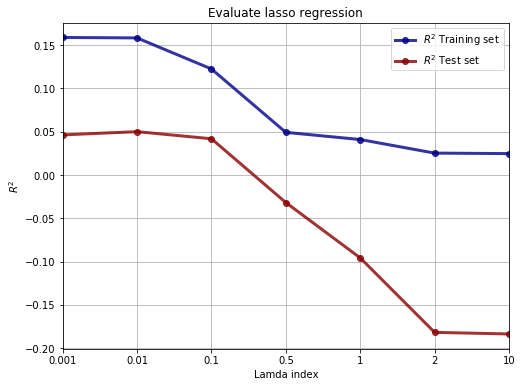

In [142]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train2, y_train2)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train2, y_train2)
    test_r_squared[ind] = reg.score(X_test2, y_test2)

# Plotting
plt.figure(figsize=(8, 6))
x = [0.001, 0.01, 0.1, 0.5, 1, 2, 10]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", 
         alpha=0.8, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", 
         alpha=0.8, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression')
plt.legend(loc='best')
plt.grid()

## 2.3. Elastic Net

In [95]:
reg_elastic_net_CV.fit(X_train2, y_train2)

ElasticNetCV(alphas=[0.1, 0.5, 1.0, 1.5, 1, 3, 5, 10.0], copy_X=True, cv=5,
             eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

DAYS_BTWN_GAMES_x         -0.000000
WINS_10GAMES_x             0.098086
WINS_10GAMES_x             0.050390
WINS_10GAMES_y            -0.015877
WINS_10GAMES_y            -0.008325
                             ...   
TEAM_ABBREVIATION_y_SAC   -0.000000
TEAM_ABBREVIATION_y_SAS   -1.879851
TEAM_ABBREVIATION_y_TOR    0.111101
TEAM_ABBREVIATION_y_UTA   -2.467520
TEAM_ABBREVIATION_y_WAS    1.569982
Length: 73, dtype: float64
Alpha is: 0.1
Grid of alphas used is: [10.   5.   3.   1.5  1.   1.   0.5  0.1]
L1 ratio is: 0.5
Intercept is: -109221.59504839193
Prediction for first house in test dataset: [225.25844201]
R2:0.019, MSE:414.53, RMSE:20.36


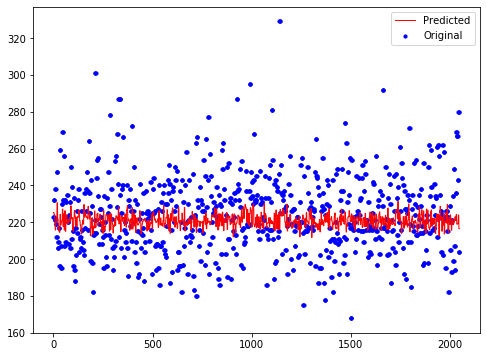

In [96]:
# coefficients 
print(pd.Series(reg_elastic_net_CV.coef_, index = X.columns))

print ("Alpha is: {0}".format(reg_elastic_net_CV.alpha_))

print ("Grid of alphas used is: {0}".format(reg_elastic_net_CV.alphas_))

print ("L1 ratio is: {0}".format(reg_elastic_net_CV.l1_ratio_))

print ("Intercept is: {0}".format(reg_elastic_net_CV.intercept_))

prediction = reg_elastic_net_CV.predict(X_test[0:1])

print ("Prediction for first house in test dataset: {0}".format(prediction))

# model metrics
score_enet2 = reg_elastic_net_CV.score(X_test2, y_test2)
ypred_enet2 = reg_elastic_net_CV.predict(X_test2)
mse_enet2 = mean_squared_error(y_test2, ypred_enet2)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_enet2, mse_enet2, np.sqrt(mse_enet2)))

plt.figure(figsize=(8, 6))
xx2 = range(len(X_test2))
plt.scatter(xx2, y_test2, s=10, color="b", label="Original")
plt.plot(xx2, ypred_enet2, lw=1, color="r", label="Predicted")
plt.legend()
plt.show()

## 2.4. Conclusion

In [97]:
print("Ridge(MSE):{0:.3f}, Lasso(MSE):{1:.2f}, Elastic Net(MSE):{2:.2f}"
      .format(mse_ridge2, mse_lasso2, mse_enet2))

Ridge(MSE):402.150, Lasso(MSE):405.03, Elastic Net(MSE):414.53


## 3. Test/Training Sets by Moving-Window

In [98]:
nba_train = nba_trans[(nba_trans['GAME_DATE'] >= '2019-01-01') & 
                      (nba_trans['GAME_DATE'] < '2019-01-14')] 
nba_test = nba_trans[(nba_trans['GAME_DATE'] >= '2019-01-14') & 
                     (nba_trans['GAME_DATE'] < '2019-01-16')] 

X_train3 = nba_train.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)
y_train3 = nba_train['TOT_PTS']

X_test3 = nba_test.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)
y_test3 = nba_test['TOT_PTS']

Let's make a function!

### II. train on one month and use the next one month as a test set

In [99]:
from dateutil.relativedelta import *
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import calendar

#nba_trans['GAME_DATE'] = pd.to_datetime(nba_trans['GAME_DATE'])

In [100]:
def train_function(i,j,k):
    start_date = date(i,j,k)
    days_in_month = calendar.monthrange(start_date.year, start_date.month)[1] # month by default
    train_date = start_date + timedelta(days=days_in_month)
    days_in_month2 = calendar.monthrange(train_date.year, train_date.month)[1]
    test_date = train_date + timedelta(days=days_in_month2)

    
    nba_train = nba_trans[(nba_trans['GAME_DATE'] >= str(start_date)) & 
                          (nba_trans['GAME_DATE'] < str(train_date))] 
    nba_test = nba_trans[(nba_trans['GAME_DATE'] >= str(train_date)) & 
                     (nba_trans['GAME_DATE'] < str(test_date))] 
    
    X_train4= nba_train.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)
    y_train4 = nba_train['TOT_PTS']
    
    X_test4 = nba_test.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)
    y_test4 = nba_test['TOT_PTS']
    
    return X_train4, y_train4, X_test4, y_test4
        
X_train4, y_train4, X_test4, y_test4 = train_function(2019,1,1) #year, month, day


In [101]:
nba_train

,GAME_DATE,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,WINS_10GAMES_x,WINS_10GAMES_y,WINS_10GAMES_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,WINS_10GAMES_y,TOT_PTS,...,TEAM_ABBREVIATION_y_OKC,TEAM_ABBREVIATION_y_ORL,TEAM_ABBREVIATION_y_PHI,TEAM_ABBREVIATION_y_PHX,TEAM_ABBREVIATION_y_POR,TEAM_ABBREVIATION_y_SAC,TEAM_ABBREVIATION_y_SAS,TEAM_ABBREVIATION_y_TOR,TEAM_ABBREVIATION_y_UTA,TEAM_ABBREVIATION_y_WAS
9023,2019-01-01,3.0,1.0,1.0,6.0,6.0,3.0,6.0,6.0,223,...,0,0,0,0,0,0,0,0,0,0
9024,2019-01-01,3.0,1.0,1.0,6.0,6.0,3.0,6.0,6.0,223,...,0,0,0,0,0,0,0,0,0,0
9025,2019-01-01,3.0,1.0,1.0,6.0,6.0,3.0,6.0,6.0,223,...,0,0,0,0,0,0,0,0,0,0
9026,2019-01-01,2.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,232,...,0,0,0,0,0,0,0,0,0,0
9027,2019-01-01,2.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,232,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9306,2019-01-13,2.0,7.0,7.0,7.0,7.0,1.0,7.0,7.0,229,...,0,0,0,0,0,0,0,0,0,0
9307,2019-01-13,2.0,7.0,7.0,7.0,7.0,1.0,7.0,7.0,229,...,0,0,0,0,0,0,0,0,0,0
9308,2019-01-13,2.0,7.0,7.0,5.0,5.0,2.0,5.0,5.0,278,...,0,0,0,0,0,0,0,0,0,1
9309,2019-01-13,2.0,7.0,7.0,5.0,5.0,2.0,5.0,5.0,278,...,0,0,0,0,0,0,0,0,0,1


### II. Train on 4 weeks and use the next 2 weeks as a test set  

This might be more flexible and fine-grained than the first function.

In [102]:
def train_function(i,j,k):
    start_date = date(i,j,k)
    train_date = start_date + relativedelta(weeks=+4) #weeks 
    test_date = train_date + relativedelta(weeks=+2)
    
    nba_train = nba_trans[(nba_trans['GAME_DATE'] >= str(start_date)) & 
                          (nba_trans['GAME_DATE'] < str(train_date))] 
    nba_test = nba_trans[(nba_trans['GAME_DATE'] >= str(train_date)) & 
                     (nba_trans['GAME_DATE'] < str(test_date))] 
    
    X_train5= nba_train.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)
    y_train5 = nba_train['TOT_PTS']
    
    X_test5 = nba_test.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)
    y_test5 = nba_test['TOT_PTS']
    
    return X_train5, y_train5, X_test5, y_test5
        
X_train5, y_train5, X_test5, y_test5 = train_function(2019,1,1) #year, month, day


In [103]:
X_train5

,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,WINS_10GAMES_x,WINS_10GAMES_y,WINS_10GAMES_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,WINS_10GAMES_y,distance_miles,rivalry,...,TEAM_ABBREVIATION_y_OKC,TEAM_ABBREVIATION_y_ORL,TEAM_ABBREVIATION_y_PHI,TEAM_ABBREVIATION_y_PHX,TEAM_ABBREVIATION_y_POR,TEAM_ABBREVIATION_y_SAC,TEAM_ABBREVIATION_y_SAS,TEAM_ABBREVIATION_y_TOR,TEAM_ABBREVIATION_y_UTA,TEAM_ABBREVIATION_y_WAS
9023,3.0,1.0,1.0,6.0,6.0,3.0,6.0,6.0,1777.98,0.0,...,0,0,0,0,0,0,0,0,0,0
9024,3.0,1.0,1.0,6.0,6.0,3.0,6.0,6.0,1777.98,0.0,...,0,0,0,0,0,0,0,0,0,0
9025,3.0,1.0,1.0,6.0,6.0,3.0,6.0,6.0,1777.98,0.0,...,0,0,0,0,0,0,0,0,0,0
9026,2.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,2714.24,0.0,...,0,0,0,0,0,0,0,0,0,0
9027,2.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,2714.24,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9618,3.0,8.0,8.0,6.0,6.0,2.0,6.0,6.0,216.93,0.0,...,0,0,0,0,0,0,0,0,0,0
9619,3.0,8.0,8.0,6.0,6.0,2.0,6.0,6.0,216.93,0.0,...,0,0,0,0,0,0,0,0,0,0
9620,1.0,1.0,1.0,5.0,5.0,3.0,5.0,5.0,635.88,0.0,...,0,0,0,0,0,0,0,0,0,0
9621,1.0,1.0,1.0,5.0,5.0,3.0,5.0,5.0,635.88,0.0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y_train5

9023    223
9024    223
9025    223
9026    232
9027    232
       ... 
9618    216
9619    216
9620    193
9621    193
9622    193
Name: TOT_PTS, Length: 600, dtype: int64

### III. If we want to indicate specific windows by hand...

In [105]:
def train_function(i,j,k):
    nba_train = nba_trans[(nba_trans['GAME_DATE'] >= i) & 
                          (nba_trans['GAME_DATE'] < j)] 
    nba_test = nba_trans[(nba_trans['GAME_DATE'] >= j) & 
                         (nba_trans['GAME_DATE'] < k)] 
    
    X_train5 = nba_train.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)
    y_train5 = nba_train['TOT_PTS']
    
    X_test5 = nba_test.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)
    y_test5 = nba_test['TOT_PTS']
    
    return X_train5, y_train5, X_test5, y_test5
        
X_train5, y_train5,X_test5, y_test5 = train_function('2019-01-01','2019-01-14', '2019-01-16') # specific dates 


## 3.1. Ridge

In [106]:
reg_CV.fit(X_train3, y_train3)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [107]:
# coefficients 
print(pd.Series(reg_CV.coef_, index = X.columns))

DAYS_BTWN_GAMES_x          5.871725
WINS_10GAMES_x             0.067539
WINS_10GAMES_x             0.067539
WINS_10GAMES_y             0.783876
WINS_10GAMES_y             0.783876
                             ...   
TEAM_ABBREVIATION_y_SAC    3.804430
TEAM_ABBREVIATION_y_SAS    6.102438
TEAM_ABBREVIATION_y_TOR   -3.862360
TEAM_ABBREVIATION_y_UTA   -6.445046
TEAM_ABBREVIATION_y_WAS    4.561288
Length: 73, dtype: float64


In [108]:
print ("Intercept is: {0}".format(reg_CV.intercept_))
print ("Prediction for first game in test dataset: {0}".format(reg_CV.predict(X_test[0:1])))

Intercept is: 187.22661200656017
Prediction for first game in test dataset: [228.07575592]


In [109]:
# model metrics
score_ridge3 = reg_CV.score(X_train3, y_train3)
ypred_ridge3 = reg_CV.predict(X_test3)
mse_ridge3 = mean_squared_error(y_test3, ypred_ridge3)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_ridge3, mse_ridge3, np.sqrt(mse_ridge3)))

R2:0.498, MSE:393.14, RMSE:19.83


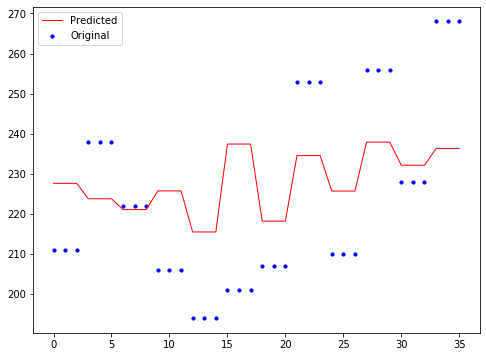

In [110]:
plt.figure(figsize=(8, 6))
xx_ridge3 = range(len(X_test3))
plt.scatter(xx_ridge3, y_test3, s=10, color="b", label="Original")
plt.plot(xx_ridge3, ypred_ridge3, lw=1, color="r", label="Predicted")
plt.legend()
plt.show()

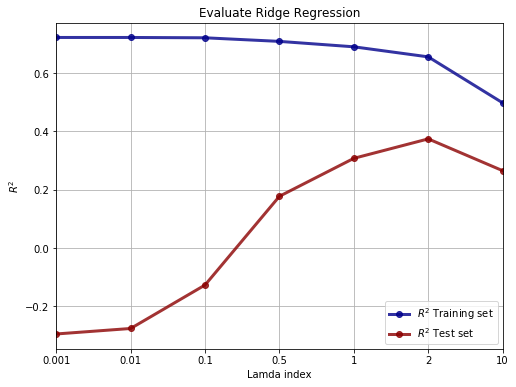

In [144]:
for ind, i in enumerate(lambdas):    
    reg = Ridge(alpha = i)
    reg.fit(X_train3, y_train3)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train3, y_train3)
    test_r_squared[ind] = reg.score(X_test3, y_test3)
    
# Plotting
plt.figure(figsize=(8, 6))
x = [0.001, 0.01, 0.1, 0.5, 1, 2, 10]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", 
         alpha=0.8, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", 
         alpha=0.8, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate Ridge Regression')
plt.legend(loc='best')
plt.grid()

## 3.2. Lasso

In [112]:
reg_lasso_CV.fit(X_train3, y_train3)

LassoCV(alphas=[0.1, 1.0, 10.0], copy_X=True, cv=5, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [113]:
# coefficients 
print(pd.Series(reg_lasso_CV.coef_, index = X.columns))

print ("Alpha is: {0}".format(reg_lasso_CV.alpha_))

print ("Intercept is: {0}".format(reg_lasso_CV.intercept_))

prediction = reg_lasso_CV.predict(X_test[0:1])

print ("Prediction for first game in test dataset: {0}".format(prediction))


DAYS_BTWN_GAMES_x          0.0
WINS_10GAMES_x             0.0
WINS_10GAMES_x             0.0
WINS_10GAMES_y             0.0
WINS_10GAMES_y             0.0
                          ... 
TEAM_ABBREVIATION_y_SAC   -0.0
TEAM_ABBREVIATION_y_SAS    0.0
TEAM_ABBREVIATION_y_TOR    0.0
TEAM_ABBREVIATION_y_UTA   -0.0
TEAM_ABBREVIATION_y_WAS    0.0
Length: 73, dtype: float64
Alpha is: 10.0
Intercept is: 205.89513629962906
Prediction for first game in test dataset: [224.38880285]


In [114]:
# model metrics
from sklearn.linear_model import Lasso

score_lasso3 = reg_lasso_CV.score(X_train3, y_train3)
ypred_lasso3 = reg_lasso_CV.predict(X_test3)
mse_lasso3 = mean_squared_error(y_test3, ypred_lasso3)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_lasso3, mse_lasso3, np.sqrt(mse_lasso3)))

R2:0.048, MSE:498.07, RMSE:22.32


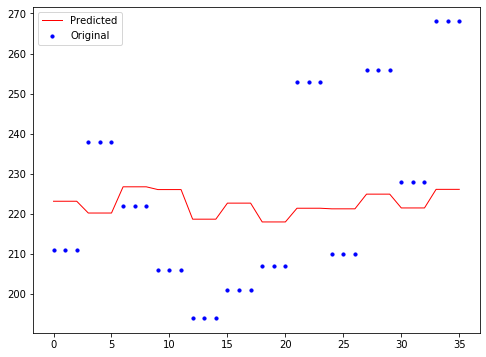

In [115]:
plt.figure(figsize=(8, 6))
xx_lasso3 = range(len(X_test3))
plt.scatter(xx_lasso3, y_test3, s=10, color="b", label="Original")
plt.plot(xx_lasso3, ypred_lasso3, lw=1, color="r", label="Predicted")
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11611.858586577488, tolerance: 11.469896875
  positive)


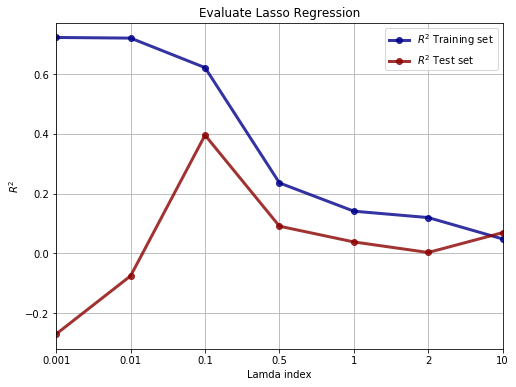

In [145]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train3, y_train3)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train3, y_train3)
    test_r_squared[ind] = reg.score(X_test3, y_test3)

# Plotting
plt.figure(figsize=(8, 6))
x = [0.001, 0.01, 0.1, 0.5, 1, 2, 10]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", 
         alpha=0.8, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", 
         alpha=0.8, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate Lasso Regression')
plt.legend(loc='best')
plt.grid()

## 3.3. Elastic Net

In [117]:
reg_elastic_net_CV.fit(X_train3, y_train3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.91240974098764, tolerance: 8.994897391304349
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.094210546303657, tolerance: 8.994897391304349
  tol, rng, random, positive)


ElasticNetCV(alphas=[0.1, 0.5, 1.0, 1.5, 1, 3, 5, 10.0], copy_X=True, cv=5,
             eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [118]:
# coefficients 
print(pd.Series(reg_elastic_net_CV.coef_, index = X.columns))

print ("Alpha is: {0}".format(reg_elastic_net_CV.alpha_))

print ("Grid of alphas used is: {0}".format(reg_elastic_net_CV.alphas_))

print ("L1 ratio is: {0}".format(reg_elastic_net_CV.l1_ratio_))

print ("Intercept is: {0}".format(reg_elastic_net_CV.intercept_))

prediction = reg_elastic_net_CV.predict(X_test[0:1])

print ("Prediction for first house in test dataset: {0}".format(prediction))



DAYS_BTWN_GAMES_x          0.000000
WINS_10GAMES_x             0.000000
WINS_10GAMES_x             0.000000
WINS_10GAMES_y             0.256185
WINS_10GAMES_y             0.256192
                             ...   
TEAM_ABBREVIATION_y_SAC   -0.000000
TEAM_ABBREVIATION_y_SAS    0.000000
TEAM_ABBREVIATION_y_TOR   -0.000000
TEAM_ABBREVIATION_y_UTA   -0.000000
TEAM_ABBREVIATION_y_WAS    0.000000
Length: 73, dtype: float64
Alpha is: 10.0
Grid of alphas used is: [10.   5.   3.   1.5  1.   1.   0.5  0.1]
L1 ratio is: 0.5
Intercept is: 201.91862576801321
Prediction for first house in test dataset: [225.13874394]


In [119]:
# model metrics
score_enet3 = reg_elastic_net_CV.score(X_test3, y_test3)
ypred_enet3 = reg_elastic_net_CV.predict(X_test3)
mse_enet3 = mean_squared_error(y_test3, ypred_enet3)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_enet3, mse_enet3, np.sqrt(mse_enet3)))

R2:0.043, MSE:511.99, RMSE:22.63


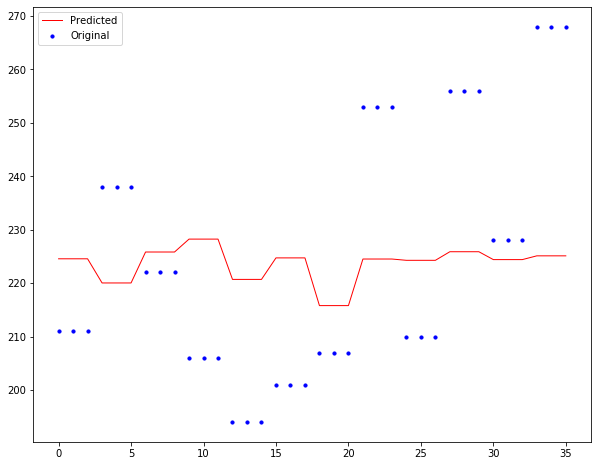

In [120]:
plt.figure(figsize=(10, 8))
xx3 = range(len(X_test3))
plt.scatter(xx3, y_test3, s=10, color="b", label="Original")
plt.plot(xx3, ypred_enet3, lw=1, color="r", label="Predicted")
plt.legend()
plt.show()

## 3.4. Conclusion

In [121]:
print("Ridge(MSE):{0:.3f}, Lasso(MSE):{1:.2f}, Elastic Net(MSE):{2:.2f}"
      .format(mse_ridge3, mse_lasso3, mse_enet3))

Ridge(MSE):393.137, Lasso(MSE):498.07, Elastic Net(MSE):511.99


## Gradient Boosting

In [124]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
 gb_reg = GradientBoostingRegressor(n_estimators=20, 
                                     learning_rate=learning_rate, 
                                     max_features=2, 
                                     max_depth=2, random_state=0)
gb_reg.fit(X_train3, y_train3)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=2,
                          max_features=2, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [125]:
names = []
scores = []
for name, score in zip(X_train3.columns,gb_reg.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False).head(n = 10)

,feature,importance_score
7,WINS_10GAMES_y,0.1580
8,distance_miles,0.1135
1,WINS_10GAMES_x,0.0942
2,WINS_10GAMES_x,0.0829
52,TEAM_ABBREVIATION_y_GSW,0.0677
34,TEAM_ABBREVIATION_x_ORL,0.0642
10,pre_PTS,0.0607
0,DAYS_BTWN_GAMES_x,0.0335
3,WINS_10GAMES_y,0.0300
61,TEAM_ABBREVIATION_y_NOP,0.0282


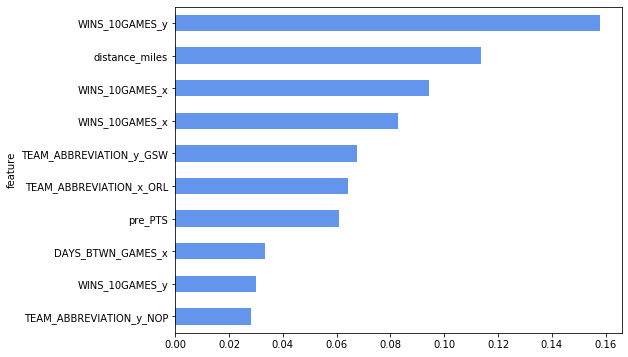

In [127]:
fi = score_df.sort_values('importance_score',ascending=False).head(n = 10)
fi = fi.sort_values('importance_score',ascending=True)
fi.plot('feature', 'importance_score','barh', figsize=(8,6), legend=False, color='cornflowerblue')

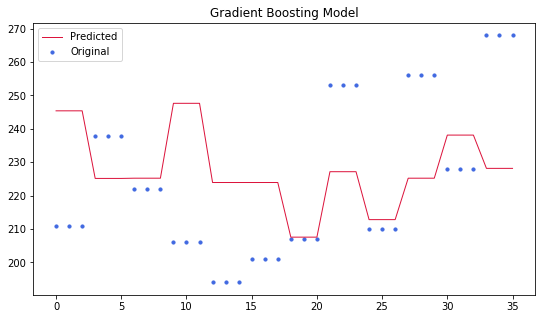

In [128]:
plt.figure(figsize=(9, 5))
xx3 = range(len(X_test3))
plt.title('Gradient Boosting Model')
plt.scatter(xx3, y_test3, s=10, color="royalblue", label="Original")
plt.plot(xx3, gb_reg.predict(X_test3), lw=1, color="crimson", label="Predicted")
plt.legend()
plt.show()

In [131]:
mse = mean_squared_error(y_test3, reg.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 498.0744


In [132]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_reg.score(X_train3, y_train3)))
print("Accuracy score (validation): {0:.3f}".format(gb_reg.score(X_test3, y_test3)))

Learning rate:  1
Accuracy score (training): 0.680
Accuracy score (validation): -0.219
